### Heroes Of Pymoli Data Analysis

-----

### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import pandas as pd
import numpy as np

# File to Load (Remember to Change These)
purchase_data = "purchase_data.csv"

# Read Purchasing File and store into Pandas data frame
purchase_data_df = pd.read_csv(purchase_data)

In [3]:
# First examine the data set
purchase_data_df.head()

,Purchase ID,SN,Age,Gender,Item ID,Item Name,Price
0,0,Lisim78,20,Male,108,"Extraction, Quickblade Of Trembling Hands",3.53
1,1,Lisovynya38,40,Male,143,Frenzied Scimitar,1.56
2,2,Ithergue48,24,Male,92,Final Critic,4.88
3,3,Chamassasya86,24,Male,100,Blindscythe,3.27
4,4,Iskosia90,23,Male,131,Fury,1.44


## Player Count

* Display the total number of players


In [4]:
# Find the unique players
unique_players = purchase_data_df["SN"].unique()
my_list = [{'Total Players':len(unique_players)}]

total_players = pd.DataFrame(my_list)
total_players

,Total Players
0,576


## Purchasing Analysis (Total)

* Run basic calculations to obtain number of unique items, average price, etc.


* Create a summary data frame to hold the results


* Optional: give the displayed data cleaner formatting


* Display the summary data frame


In [5]:
# Find unique items
unique_items = purchase_data_df["Item ID"].unique()

# Find average price
avg_price = purchase_data_df['Price'].mean()
currency = "${:,.2f}".format(avg_price)

# Find number of purchases
total_purchases = purchase_data_df['Purchase ID'].count()

# Find total revenue
total_revenue = purchase_data_df['Price'].sum()
rev_currency = "${:,.2f}".format(total_revenue)

# Create a dictionary list of summary numbers
purchase_list = [{'Number of Unique Items':len(unique_items),
                 'Average Price':currency,
                 'Number of Purchases':total_purchases,
                 'Total Revenue':rev_currency}]

# Create and display the summary data frame
Purchasing_Analysis = pd.DataFrame(purchase_list)
Purchasing_Analysis

,Number of Unique Items,Average Price,Number of Purchases,Total Revenue
0,183,$3.05,780,"$2,379.77"


## Gender Demographics

* Percentage and Count of Male Players


* Percentage and Count of Female Players


* Percentage and Count of Other / Non-Disclosed




In [6]:
# Group by gender
gender_group = purchase_data_df.groupby('Gender')

# Find total players
gender_counts = gender_group.agg({"SN": "nunique"})

In [7]:
# Create data frame
# Calculate percent


gender_demog = pd.DataFrame({'Total Count':gender_counts['SN'],
                             'Percentage of Players':round(((gender_counts['SN']/(len(purchase_data_df["SN"].unique())))*100),2)
    
})

# Clean up output
gender_demog.sort_values('Total Count', ascending=False)

,Total Count,Percentage of Players
Gender,,
Male,484,84.03
Female,81,14.06
Other / Non-Disclosed,11,1.91



## Purchasing Analysis (Gender)

* Run basic calculations to obtain purchase count, avg. purchase price, avg. purchase total per person etc. by gender




* Create a summary data frame to hold the results


* Optional: give the displayed data cleaner formatting


* Display the summary data frame

In [8]:
# Create data frame for: Purchase Count, Average Purchase Price, Total Purchase Value, Avg Total Purchase per Person
gender_analysis = pd.DataFrame({'Purchase Count':gender_group['SN'].count(),
                               'Average Purchase Price':round(gender_group['Price'].mean(),2),
                               'Total Purchase Value':round(gender_group['Price'].sum(),2),
                               'Avg Total Purchase per Person':round((gender_group['Price'].sum()/gender_counts['SN']),2)
                               })
gender_analysis

,Purchase Count,Average Purchase Price,Total Purchase Value,Avg Total Purchase per Person
Gender,,,,
Female,113,3.20,361.94,4.47
Male,652,3.02,1967.64,4.07
Other / Non-Disclosed,15,3.35,50.19,4.56


## Age Demographics

* Establish bins for ages


* Categorize the existing players using the age bins. Hint: use pd.cut()


* Calculate the numbers and percentages by age group


* Create a summary data frame to hold the results


* Optional: round the percentage column to two decimal points


* Display Age Demographics Table


In [9]:
# Establish bins and bin labels for ages
age_bins = [0, 9, 14, 19, 24, 29, 34, 39, 100]
age_labels = ['<10', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40+']

# Categorize the players in our original data set
purchase_data_df['Age Cat'] = pd.cut(purchase_data_df["Age"], age_bins, labels=age_labels)

In [10]:
# Group by our new Age Cat variable
age_group = purchase_data_df.groupby('Age Cat')

# Get the total players per category
age_counts = age_group.agg({"SN": "nunique"})

In [11]:
# Create data frame
age_demog = pd.DataFrame({'Total Count':age_counts['SN'],
                             'Percentage of Players':round(((age_counts['SN']/(len(purchase_data_df["SN"].unique())))*100),2)
    
})

# Display output
age_demog

,Total Count,Percentage of Players
Age Cat,,
<10,17,2.95
10-14,22,3.82
15-19,107,18.58
20-24,258,44.79
25-29,77,13.37
30-34,52,9.03
35-39,31,5.38
40+,12,2.08


## Purchasing Analysis (Age)

* Bin the purchase_data data frame by age


* Run basic calculations to obtain purchase count, avg. purchase price, avg. purchase total per person etc. in the table below


* Create a summary data frame to hold the results


* Optional: give the displayed data cleaner formatting


* Display the summary data frame

In [12]:
# Create data frame with : Purchase Count, Average Purchase Price, Total Purchase Value, Avg Total Purchase per Person
age_analysis = pd.DataFrame({'Purchase Count':age_group['SN'].count(),
                               'Average Purchase Price':round(age_group['Price'].mean(),2),
                               'Total Purchase Value':round(age_group['Price'].sum(),2),
                               'Avg Total Purchase per Person':round((age_group['Price'].sum()/age_counts['SN']),2)
                               })
age_analysis

,Purchase Count,Average Purchase Price,Total Purchase Value,Avg Total Purchase per Person
Age Cat,,,,
<10,23,3.35,77.13,4.54
10-14,28,2.96,82.78,3.76
15-19,136,3.04,412.89,3.86
20-24,365,3.05,1114.06,4.32
25-29,101,2.90,293.00,3.81
30-34,73,2.93,214.00,4.12
35-39,41,3.60,147.67,4.76
40+,13,2.94,38.24,3.19


## Top Spenders

* Run basic calculations to obtain the results in the table below


* Create a summary data frame to hold the results


* Sort the total purchase value column in descending order


* Optional: give the displayed data cleaner formatting


* Display a preview of the summary data frame



In [13]:
# Group by SN
SN_group = purchase_data_df.groupby('SN')

# Create the summary data frame
top_spenders = pd.DataFrame({'Purchase Count':SN_group['SN'].count(),
                               'Average Purchase Price':round(SN_group['Price'].mean(),2),
                               'Total Purchase Value':round(SN_group['Price'].sum(),2)
                               })

# Sort by total purchase (descending) and preview summary data frame
top_spenders.sort_values('Total Purchase Value', ascending=False).head()

,Purchase Count,Average Purchase Price,Total Purchase Value
SN,,,
Lisosia93,5,3.79,18.96
Idastidru52,4,3.86,15.45
Chamjask73,3,4.61,13.83
Iral74,4,3.40,13.62
Iskadarya95,3,4.37,13.10


## Most Popular Items

* Retrieve the Item ID, Item Name, and Item Price columns


* Group by Item ID and Item Name. Perform calculations to obtain purchase count, item price, and total purchase value


* Create a summary data frame to hold the results


* Sort the purchase count column in descending order


* Optional: give the displayed data cleaner formatting


* Display a preview of the summary data frame



In [14]:
# Group by Item ID and Item Name
popular_group = purchase_data_df.groupby(['Item ID', 'Item Name'])
popular_group.head()

#Obtain purchase count, item price, and total purchase value
#Create the summary data frame
popular_items = pd.DataFrame({'Purchase Count':popular_group['SN'].count(),
                               'Item Price':(round(popular_group['Price'].sum(),2))/(popular_group['SN'].count()),
                               'Total Purchase Value':round(popular_group['Price'].sum(),2)
                               })

# Sort by purchase count, descending
popular_items.sort_values('Purchase Count', ascending=False).head()

,,Purchase Count,Item Price,Total Purchase Value
Item ID,Item Name,,,
178,"Oathbreaker, Last Hope of the Breaking Storm",12,4.23,50.76
145,Fiery Glass Crusader,9,4.58,41.22
108,"Extraction, Quickblade Of Trembling Hands",9,3.53,31.77
82,Nirvana,9,4.90,44.10
19,"Pursuit, Cudgel of Necromancy",8,1.02,8.16


## Most Profitable Items

* Sort the above table by total purchase value in descending order


* Optional: give the displayed data cleaner formatting


* Display a preview of the data frame



In [15]:
# Sort by total purchase value, descending
popular_items.sort_values('Total Purchase Value', ascending=False).head()

,,Purchase Count,Item Price,Total Purchase Value
Item ID,Item Name,,,
178,"Oathbreaker, Last Hope of the Breaking Storm",12,4.23,50.76
82,Nirvana,9,4.90,44.10
145,Fiery Glass Crusader,9,4.58,41.22
92,Final Critic,8,4.88,39.04
103,Singed Scalpel,8,4.35,34.80


## Observed Trends
Based on the analysis above, I have determined the following three trends:
1. Males purchase many more items than females (652 vs. 113, respectively). Yet, females have a higher avg purchase price per person (`$4.47`) than males (`$4.07`)
2. The item prices range from `$1.00 to $4.99`, with the average item costing approximately `$3.05`
3. This game seems to appeal more to a younger audience, as only `2.08%` are ages 40 or older

## My Visual Analysis

In [16]:
import matplotlib.pyplot as plt

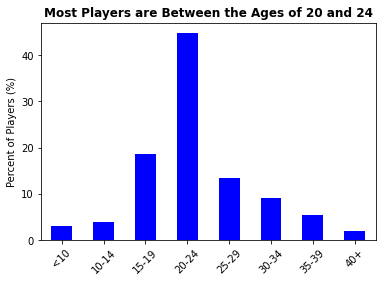

In [17]:
age_demog['Percentage of Players'].plot(kind='bar', color='b', 
                                       xlabel='',
                                       ylabel='Percent of Players (%)')
plt.xticks(rotation=45)
plt.title('Most Players are Between the Ages of 20 and 24', fontsize=12, fontweight='bold')

plt.show()

This simple bar chart displays basic demographic information in our data set. Namely, the majority of players are between the ages of 20 to 24. The distribution of the age variable follows a vague bell-shape, with the smallest percentages at either end of the distribution ("less than 10 years of age" and "40+ years of age," representing the smallest categories).

## Data Camp screen shots: Data Manipulation with Pandas

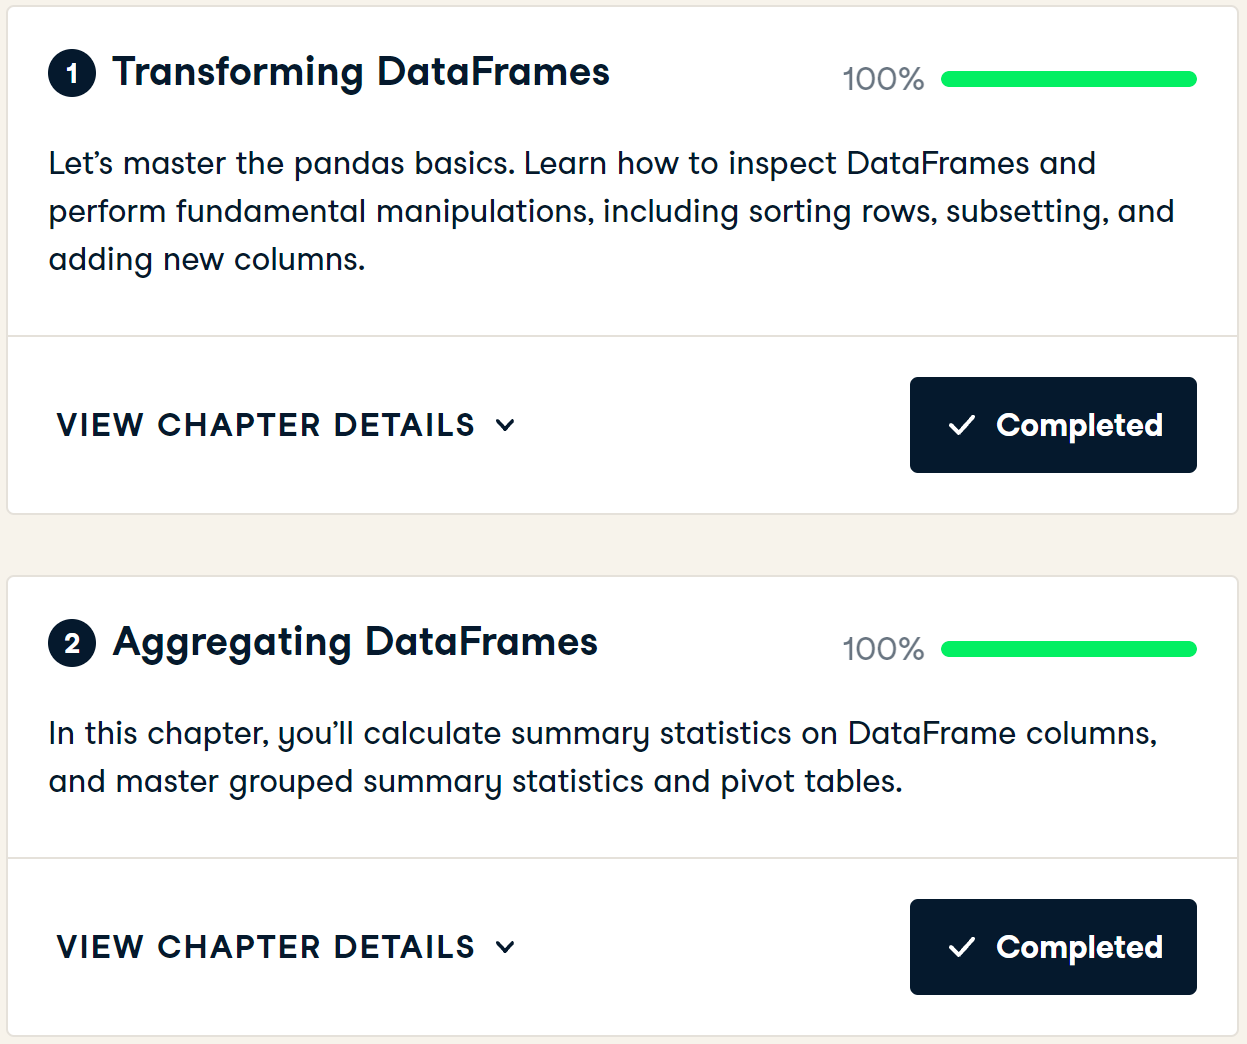

In [18]:
from IPython import display
display.Image('Pandas1.png')

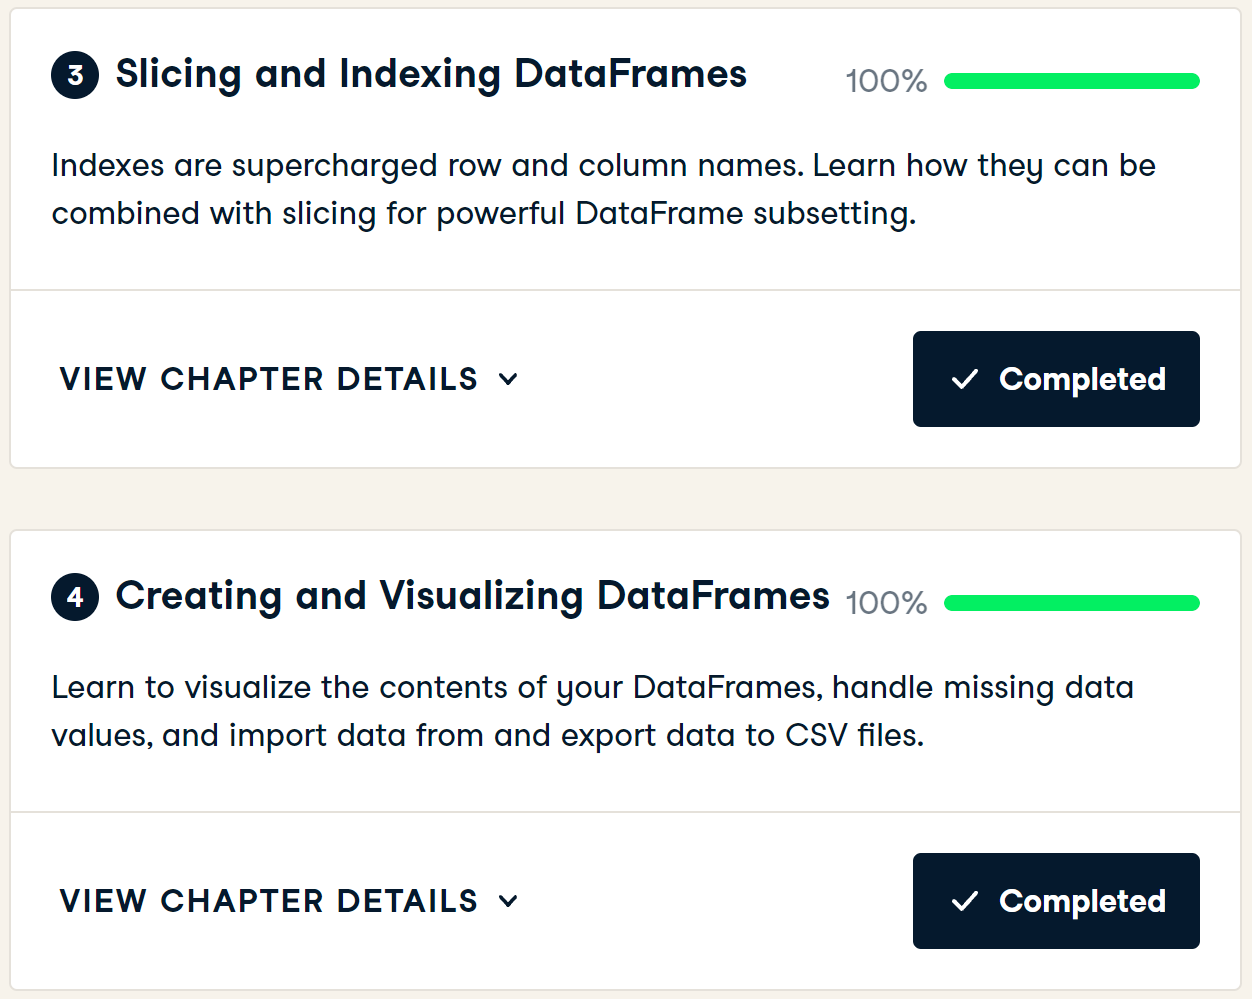

In [19]:
display.Image('Pandas2.png')

## Data Camp screen shots: Introduction to Data Visualization with Matplotlib

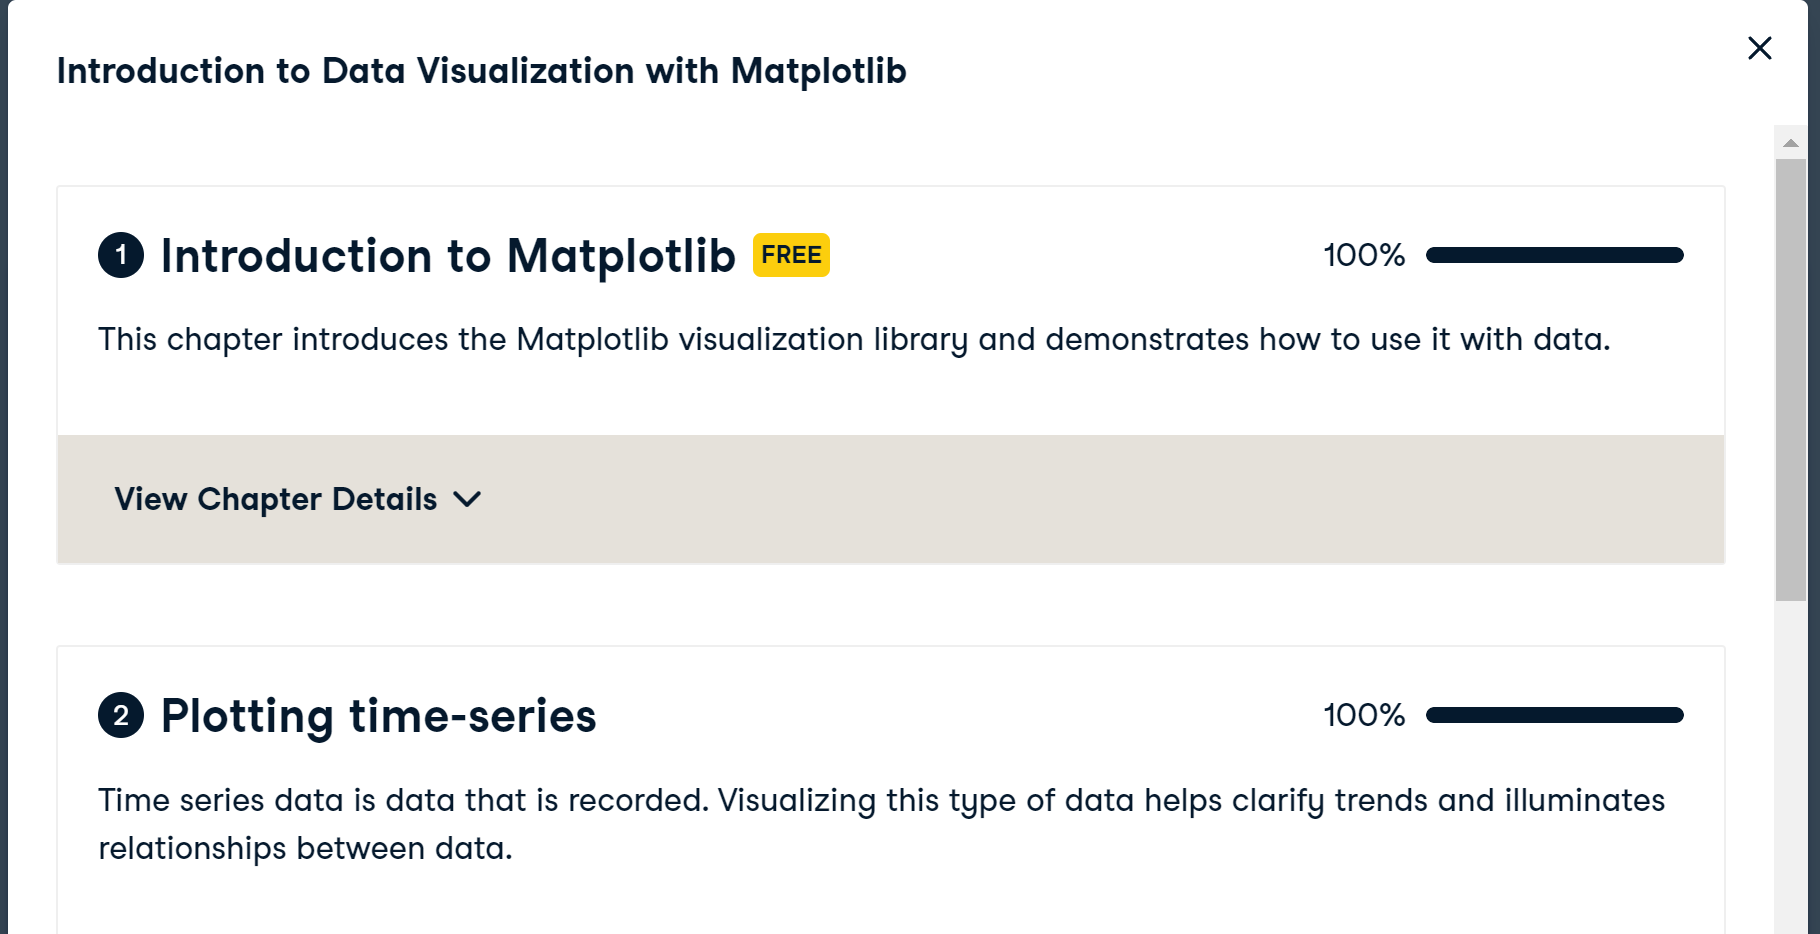

In [20]:
display.Image('Matplotlib1-2.png')